In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Image Processing and Feature Extraction

In [10]:
import os
import cv2

# Define the paths to your image files
image_dir = "C:\\Users\\vardh\\Desktop\\5th Sem\\PRML\\Lab10\\Images"

# Initialize lists to store feature vectors and labels
X = []  # Feature vectors
y = []  # Labels (1 or 2)

# Loop through the images and extract features
for image_file in os.listdir(image_dir):
    if image_file.startswith("poly"):
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load image in grayscale
        if int(image_file[4]) <= 7:
            label = 1  # Images poly1 to poly7 belong to class 1
        else:
            label = 2  # Images poly8 to poly14 belong to class 2
        # Extract features (x1 and x2)
        x1 = np.mean(image)
        x2 = np.var(image)
        X.append([x1, x2])
        y.append(label)

# Convert feature vectors and labels to numpy arrays
X = np.array(X)
y = np.array(y)

### Perceptron Training

In [11]:
# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0

# Define the perceptron function
def perceptron(x):
    return 1 if np.dot(w, x) + b > 0 else 2

# Training the perceptron
learning_rate = 0.01
num_iterations = 1000
for _ in range(num_iterations):
    for i in range(len(X)):
        prediction = perceptron(X[i])
        if prediction != y[i]:
            if prediction == 1:
                w -= learning_rate * X[i]
                b -= learning_rate
            else:
                w += learning_rate * X[i]
                b += learning_rate

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, w, b):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
    Z = np.array([perceptron([x1, x2]) for x1, x2 in np.c_[xx1.ravel(), xx2.ravel()]])

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='o')
    plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label='Class 2', marker='x')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, w, b)

MemoryError: Unable to allocate 58.3 GiB for an array with shape (315221, 24817) and data type float64

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define a function to plot the decision boundary
def plot_decision_boundary(X, y, w, b):
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Reduce the step size for creating the mesh grid
    step = 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step), np.arange(x2_min, x2_max, step))
    
    Z = np.array([perceptron([x1, x2]) for x1, x2 in np.c_[xx1.ravel(), xx2.ravel()]])

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4)
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', marker='o')
    plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label='Class 2', marker='x')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Plot the decision boundary
plot_decision_boundary(X, y, w, b)

In [13]:
# Create a meshgrid for the feature space with lower resolution
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))  # Reduced resolution

# Compute the decision boundary
Z = np.array([perceptron([x1, x2]) for x1, x2 in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('Feature 1 (x1)')
plt.ylabel('Feature 2 (x2)')
plt.title('Perceptron Decision Boundary')
plt.show()

KeyboardInterrupt: 

### SVM Modelling

#### Generate Feature Vectors

In [4]:
from sklearn.utils import shuffle

# Define paths
image_dir = "C:\\Users\\vardh\\Desktop\\5th Sem\\PRML\\Lab10\\Images"
class1_images = range(1, 8)
class2_images = range(8, 15)

# Initialize lists to store feature vectors and labels
X = []  # Feature vectors
y = []  # Labels (1 or 2)

# Loop through the images and extract features
for i in class1_images:
    image_path = os.path.join(image_dir, f"poly{i}.png")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    x1 = np.mean(image)  # Calculate x1 (average pixel intensity)
    x2 = np.var(image)   # Calculate x2 (variance of pixel intensity)
    X.append([x1, x2])
    y.append(1)  # Class 1

for i in class2_images:
    image_path = os.path.join(image_dir, f"poly{i}.png")
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    x1 = np.mean(image)  # Calculate x1 (average pixel intensity)
    x2 = np.var(image)   # Calculate x2 (variance of pixel intensity)
    X.append([x1, x2])
    y.append(2)  # Class 2

X = np.array(X)
y = np.array(y)

# Shuffle the data
X, y = shuffle(X, y, random_state=42)

#### Training SVM

In [5]:
# Define the SVM parameters
learning_rate = 0.01
C = 1.0  # Regularization parameter

# Initialize weights and bias
w = np.zeros(X.shape[1])
b = 0

# Define the hinge loss function
def hinge_loss(w, b, X, y):
    loss = 1 - y * (np.dot(X, w) + b)
    return max(0, loss)

# Training the SVM using stochastic gradient descent
num_iterations = 1000
for _ in range(num_iterations):
    for i in range(len(X)):
        if y[i] * (np.dot(X[i], w) + b) >= 1:
            w -= learning_rate * (2 * 1 / num_iterations * w)
        else:
            w -= learning_rate * (2 * 1 / num_iterations * w - np.dot(X[i], y[i]))
            b -= learning_rate * y[i]

#### Plot the Decision Boundary

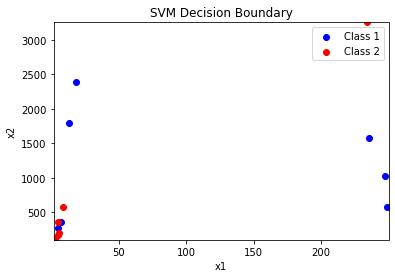

In [6]:
import matplotlib.pyplot as plt

# Create a meshgrid for the entire feature space
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))

# Predict the class labels for all points in the meshgrid
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=('blue', 'white', 'red'), alpha=0.4)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='blue', label='Class 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], c='red', label='Class 2')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Decision Boundary')
plt.legend()
plt.show()